# Esercitazione 10
**7  Maggio 2024**

In [9]:
import numpy as np
import scipy as sp
import scipy.linalg as spl
import numpy.linalg as npl
import SolveTriangular
import matplotlib.pyplot as plt

- Minimizzare il minimo
x* = ||Ba - y||^2

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

#### Si usa quando
- matrice ben condizionata (indice di Condizionamento K è K(B)^2)
- matrice a rango massimo, simmetrica e definita positiva

In [6]:
# B^T @ B @ a = B^T y

def eqnorm(B: np.matrix, y):
    G = B.T @ B
    condG = npl.cond(G)
    print("Condizionamento di G", condG)
    
    f = B.T @ y

    # dato che simmetrica e definita positiva: uso cholesky
    L = spl.cholesky(G, lower=True)
    b, flag = SolveTriangular.Lsolve(L, f)

    if flag == 0:
        a, flag = SolveTriangular.Usolve(L.T, b)
        return a
    
    return None

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

#### Si usa quando
- la matrice è mediamente mal condizionata (non passando per B^T @ B l'indice di condizionamento rimane più basso)
- matrice a rango massimo

In [16]:
# Q* = argmin ||Ba - y||^2 = ||Q^T (Ba - y)||^2 = ||R1a - h1||^2 + ||h2||^2 (con B = QR)
def qrLS(B: np.matrix, y):
    n = B.shape[1]
    Q, R = npl.qr(B)
    h = Q.T @ y

    R1 = R[0:n, 0:n]
    h1 = h[0:n]
    a = SolveTriangular.Usolve(R1, h1)

    return a

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

#### Si usa quando
- matrice non a rango massimo
- matrica mal condizionata

In [ ]:
# U^T @ A @ V = Ʃ (U e V  matrici ortogonali)

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



[[ 1.  -3.5]
 [ 1.  -3. ]
 [ 1.  -2. ]
 [ 1.  -1.5]
 [ 1.  -0.5]
 [ 1.   0.5]
 [ 1.   1.7]
 [ 1.   2.5]
 [ 1.   3. ]]
Condizionamento di G 5.27297104169736


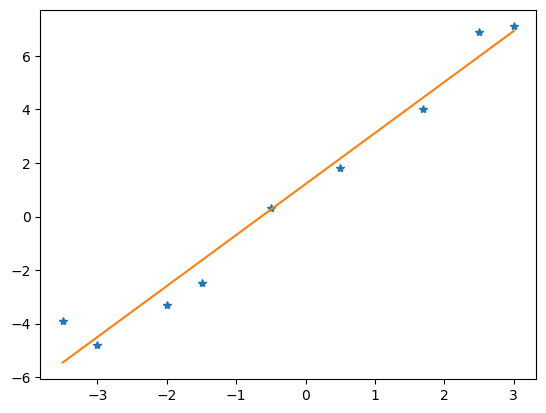

In [15]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])

n = 1 #grado del polinomio di regressione
n1 = n + 1 #gradi di libertà o numero dei coefficenti di un polinomio
m = x.shape
B = np.vander(x, increasing=True)[:, :n1] #prendo le prime n1 colonne: definiscono il grado del polinomio

print(B)

a_EQN = eqnorm(B, y) # calcolo i coefficenti del polinomio di regressione
xv = np.linspace(np.min(x), np.max(x), 200)
pol_EQN = np.polyval(np.flip(a_EQN), xv) #inverto i coefficenti del polinomio: p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]

plt.plot(x, y, '*', xv, pol_EQN)
plt.show()

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



1. costruire la matrice di vandermonde n < m
2. calcolare la soluzione del sistema sovraderminato

### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [19]:
# calcolo del j-esimo polinomio di lagrange
def plagr(xnodi, j):
    x_zeri = np.zeros_like(xnodi)
    n = xnodi.size

    # prendo tutti gli x nodi tranne il j-esimo
    if j == 0:
        x_zeri = xnodi[1:n]
    else:
        x_zeri = np.append(xnodi[0:j], xnodi[j+1:n]) 

    num = np.poly(x_zeri) # che restituisce i coefficenti del polinomio (x - x_0)(x - x_1)...(x-x_j-1)(x-x_j+1)...(x-x_n)
    den = np.polyval(num, xnodi[j])

    return num / den

In [27]:
def interpL(x, y, xv):
    n = x.size
    nv = xv.size

    L = np.zeros((nv, n))
    for j in range(n): # creo la matrice di Lagrange colonna per colonna
        p = plagr(x, j) # calcolo il polinomio di lagrange di grado j-esimo
        L[:,j] = np.polyval(p, xv) # nella collona j-esima metto il polinomio di grado j valutato nei punti xv

    return L @ y

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

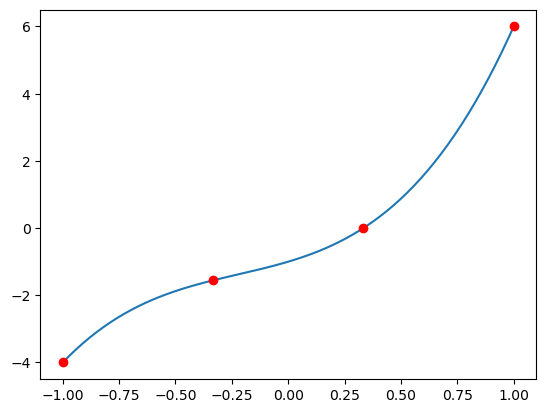

In [33]:
n = 3
x = np.linspace(-1, 1, n+1)
f = lambda x: 3*x**3 + 2*x**2 + 2*x - 1
y = f(x)
xv = np.linspace(-1, 1, 200)

pol_interpl = interpL(x, y, xv)

plt.plot(xv, pol_interpl, x, y, 'ro')
plt.show()

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


In [17]:
x = np.array([1, 2])
coeff

array([ 1., -3.,  2.])